In [1]:
# Verify library versions
import tdt
import neurokit2 as nk
from neurokit2 import signal_filter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import signal_processing as sp
import importlib

print("TDT version:", tdt.__version__)
print("NeuroKit2 version:", nk.__version__)
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)

TDT version: 0.6.6
NeuroKit2 version: 0.2.10
NumPy version: 1.26.4
Pandas version: 2.2.3
Matplotlib version: 3.10.0


In [2]:
tdt_path = r'C:\Users\tomhu\Desktop\Code\respiratory_pilot\EcgData'

mouse = tdt.read_block(tdt_path)

print(mouse)

read from t=0s to t=302.25s
epocs	[struct]
snips	[struct]
streams	[struct]
scalars	[struct]
info	[struct]
time_ranges:	array([[ 0.],
       [inf]])


In [3]:
print(f"streams data: {mouse.streams.keys()}")
print(f"epocs: {mouse.epocs.keys()}")
print(f"info data: {mouse.info.keys()}")
print(f"scalar data: {mouse.scalars.keys()}")
print(f"snips data: {mouse.snips.keys()}")

streams data: dict_keys(['Resp'])
epocs: dict_keys(['Cam1', 'Tick'])
info data: dict_keys(['tankpath', 'blockname', 'start_date', 'utc_start_time', 'stop_date', 'utc_stop_time', 'duration', 'stream_channel', 'snip_channel'])
scalar data: dict_keys([])
snips data: dict_keys([])


In [4]:
print(dir(mouse.streams['Resp']))

['__bool__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'channel', 'clear', 'code', 'copy', 'data', 'dform', 'fromkeys', 'fs', 'get', 'items', 'keys', 'name', 'pop', 'popitem', 'setdefault', 'size', 'start_time', 'type', 'type_str', 'ucf', 'update', 'values']


In [5]:
# Calling it ecg stream for now, not sure if it's actually resp or not  
ecg_stream = mouse.streams['Resp']

# Extract key attributes
resp_data = ecg_stream.data
fs = ecg_stream.fs
start_time = ecg_stream.start_time
data_shape = ecg_stream.data.shape
size = ecg_stream.size
channel = ecg_stream.channel
stream_name = ecg_stream.name


In [6]:
# Apply the custom filtering logic
rsp_cleaned = nk.signal_filter(
    resp_data,
    lowcut=0.1,   # Low cutoff frequency (Hz)
    highcut=20,   # High cutoff frequency (Hz)
    method="butterworth",  # Filtering method
    sampling_rate=fs,
    order=2  # Filter order
)

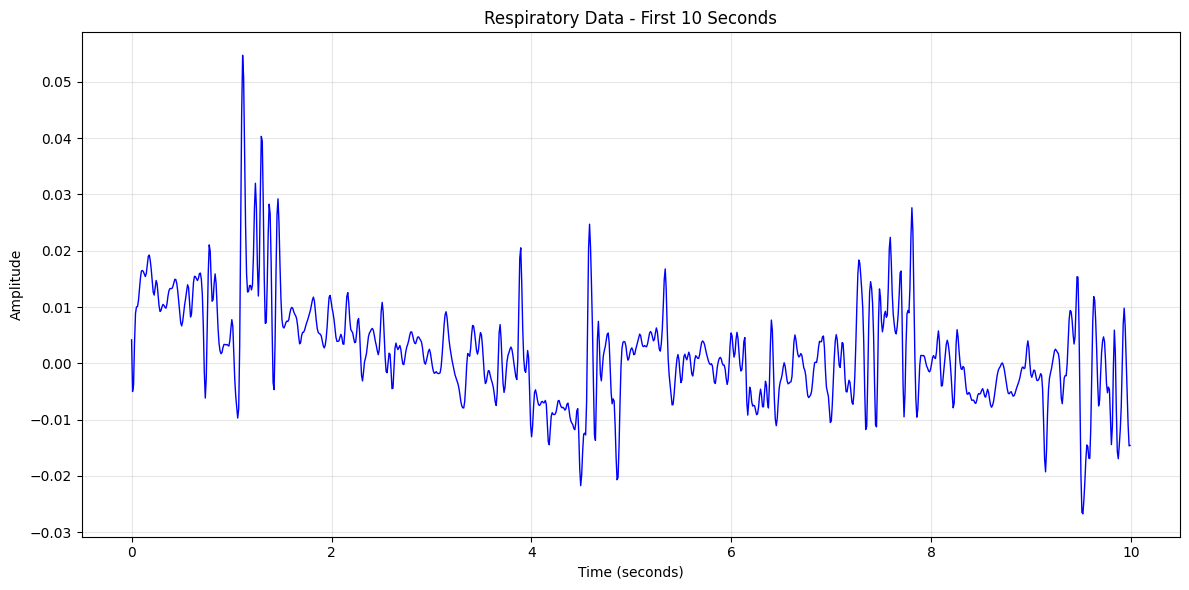

In [7]:
n_samples = int(10 * fs)

# Create time array for x-axis
time = np.arange(n_samples) / fs + start_time

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(time, rsp_cleaned[:n_samples], 'b-', linewidth=1)

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'Respiratory Data - First {10} Seconds')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

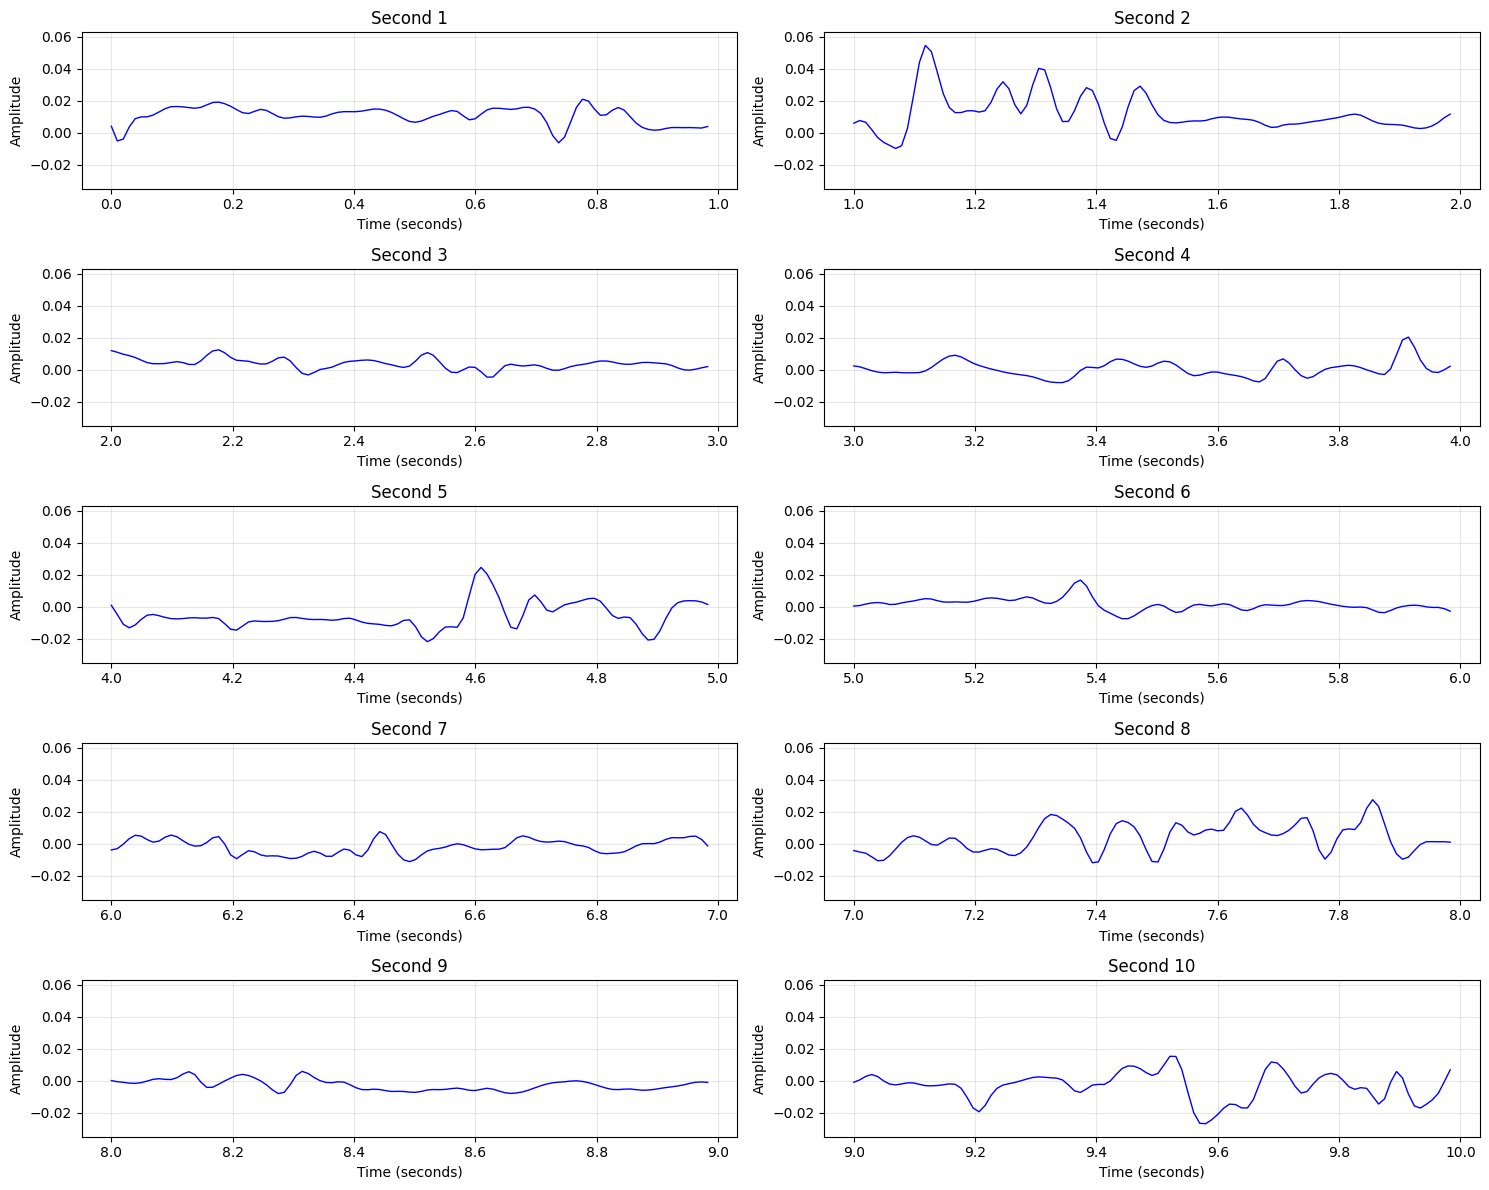

In [8]:
import resp_plotting
import importlib
importlib.reload(resp_plotting)

resp_plotting.plot_respiratory_data_by_second(rsp_cleaned, fs, start_time)
